<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/prop/unidad_didac/visualizacion/2_seaborn/visualizing_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Clasificación binaria para la detección de fraudes 

- Plantear bien la pregunta.

¿Regresión o clasificación?  
¿Tipo de regresión y tipo de clasificación?  
En este caso tenemos una base de datos que se llama “Synthetic Financial Datasets For Fraud Detection“ (Conjuntos de datos financieros sintéticos para la detección de fraudes), por lo cual se trabajará con Clasificación binaria. 

Exploración inicial 

- Indicar la fuente de dónde se toman los datos.
Dataset tomado de: https://www.kaggle.com/code/carmencastrogonzlez/fraud-detection-full-project-in-spanish/notebook

La variable `isFraud` (variable objetivo) es el indicador que indica si las transacciones son fraude con el valor 1 o no, con el valor 0, mientras que isFlaggedFraud es lo que el sistema previene de la transacción debido a que se activan algunos umbrales.

- Decir cuáles son los atributos (descripción breve de cada uno)

step  - mapea una unidad de tiempo en el mundo real. En este caso 1 paso es 1 hora de tiempo. Pasos totales 744 (simulación de 30 días).

type  - CASH-IN, CASH-OUT, DÉBITO, PAGO y TRANSFERENCIA.

amount  - monto de la transacción en moneda local.

nameOrig - cliente que inició la transacción

oldbalanceOrg - saldo inicial antes de la transacción

newbalanceOrig - nuevo saldo después de la transacción

nameDest - cliente que es el destinatario de la transacción

oldbalanceDest: destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

newbalanceDest - destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

isFraud: estas son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrando del sistema.

`isFlaggedFraud`: el modelo comercial tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.

# Practicar una primera exploración gráfica de los datos.

**Función objetivo**

La función escalón es la función de activación referente a la clasificación binaria, donde y devuelve valores de -1 o +1:

$ y = sign(x), \left \{ y: -1,  1 \right \}$

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv("data_balanceada.csv")

In [3]:
d.keys()

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER',
       'isFlaggedFraud', 'isFraud'],
      dtype='object')

In [4]:
d.shape

(16426, 13)

*Se recomienda hacer alguna observación del proceso de obtención de los datos*

* Sabemos que hay 11 atributos predictores 
* y dos posobres variables objetivo.
* El dataset es pequeño con aproximadamente 16 mil instancias. 


- Clasificar: un conjunto de individuos en una serie de grupos, teniendo en cuenta que cada individuo solamente puede pertenecer a uno de ellos 

# Descripcion tabular de los datos 

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   CASH_IN         16426 non-null  int64  
 7   CASH_OUT        16426 non-null  int64  
 8   DEBIT           16426 non-null  int64  
 9   PAYMENT         16426 non-null  int64  
 10  TRANSFER        16426 non-null  int64  
 11  isFlaggedFraud  16426 non-null  int64  
 12  isFraud         16426 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.6 MB


* Todas las variables son de tipo numérico
* algunas variables son discretas, las asociadas a un tipo de valor int64 y las demás parecen ser de tipo continuo ya que son de tipo float. 

In [6]:
d.isnull().sum() # cantidad de elementos faltantes por cada variable 

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
isFlaggedFraud    0
isFraud           0
dtype: int64

* Efectivamente no hay valores faltantes asociados a las diferentes variables en este dataset. 

In [7]:
d.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000
mean,306.763850,8.201540e+05,1.245401e+06,5.286141e+05,8.603087e+05,1.285583e+06,0.110617,0.430050,0.003714,0.165287,0.290332,0.000974,0.500000
std,193.584036,1.860112e+06,3.250161e+06,2.501223e+06,4.355745e+06,4.651907e+06,0.313667,0.495098,0.060828,0.371450,0.453930,0.031196,0.500015
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,3.712309e+04,1.008625e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283.000000,1.729433e+05,1.196647e+05,0.000000e+00,0.000000e+00,1.295114e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,410.000000,5.396587e+05,7.995173e+05,0.000000e+00,5.238782e+05,1.097807e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,743.000000,2.623419e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


De la utilización con el método `.describe()` se infiere la necesaidad de escalar los atributos numéricos y podemos aplicar la estrategia de normalización o estandarización de datos 

* Se recomienda el redactar todas las inderencias que de la utilización de los métodos `info()` y describe se desprenden, como son:

* la lista de atributos categóricos
  * lista de atributos dicotómicos
  * lista de atributos multiclase o no binarios 
* lista de aatributos numéricos continuos
* lista de atributos numéricos discretos
* la necesidad de escalamiento de atributos numéricos y la estrategia a utilizar. 

# Visualización del dataset a través de histogramas y diagramas de dispersión

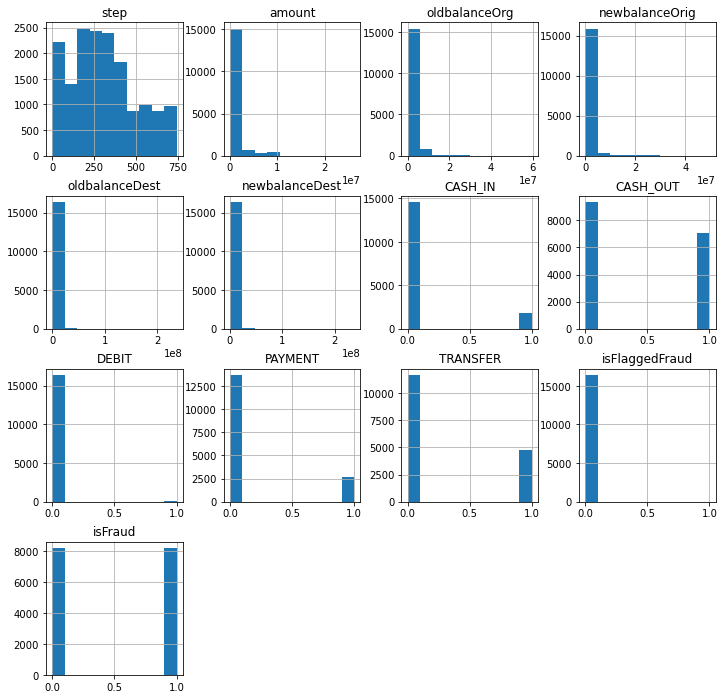

In [8]:
d.hist(figsize=(12,12)) 
# Construye una cuadrícula de histogramas para cada variable numérica
plt.show()

Hay 5 variables categógicas dicotómicas codificadas a saber:

* `CASH_IN`
* `CASH_OUT` 
* `DEBIT`  
* `PAYMENT`  
* `TRANSFER`

*Si la variable objetivo es `isFraud` entonces es aplicable la medida de desempeño de accuracy mientras que si la variable objetivo es `isFlaggedFraud` no es aplicable la exactitud pues la la clase negativa se presenta mayoritariamente*

* Dada la asimetría de la distribución de las variables asociadas al problema, se infiere que una estrategia de imputación aplicable es la mediana y no la media o promedio. 

*Racordemos que la cuadrícula de histogramas puede ayudarnos a establecer la estrategia de imputación de datos faltantes*. 

Se recomienda redactar todas las observaciones que se descrendan de la observación  de los histogramoas asociados a cada atributo:

* atributos con distribución acampanada
* atributos con distribución asimétrica.
* la estrategia de imputación: si con la media, con la mediana o con el dato más freciente. 

In [ ]:
d.isnull().sum() # Cantidad de elementos faltantes por cada variable

# Análisis de correlaciones

In [9]:
#Matriz de correlacion
d.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
step,1.000000,0.147428,0.076324,-0.019370,0.001201,0.027296,-0.104487,0.031867,-0.020410,-0.131790,0.148023,0.037229,0.318476
amount,0.147428,1.000000,0.647610,0.123301,0.002099,0.209443,-0.123360,0.046951,-0.026738,-0.193088,0.195620,0.067845,0.348276
oldbalanceOrg,0.076324,0.647610,1.000000,0.823875,0.003924,0.095766,0.257263,-0.101795,-0.021785,-0.161272,0.068145,0.063146,0.124387
newbalanceOrig,-0.019370,0.123301,0.823875,1.000000,0.030041,0.003838,0.459268,-0.181225,-0.010921,-0.083123,-0.050212,0.091002,-0.134427
oldbalanceDest,0.001201,0.002099,0.003924,0.030041,1.000000,0.951953,0.067040,0.096278,0.003027,-0.087893,-0.079817,-0.006168,-0.072564
newbalanceDest,0.027296,0.209443,0.095766,0.003838,0.951953,1.000000,0.021134,0.185311,-0.002564,-0.122979,-0.115744,-0.008630,-0.001263
CASH_IN,-0.104487,-0.123360,0.257263,0.459268,0.067040,0.021134,1.000000,-0.306343,-0.021531,-0.156934,-0.225573,-0.011012,-0.352669
CASH_OUT,0.031867,0.046951,-0.101795,-0.181225,0.096278,0.185311,-0.306343,1.000000,-0.053033,-0.386537,-0.555599,-0.027124,0.143626
DEBIT,-0.020410,-0.026738,-0.021785,-0.010921,0.003027,-0.002564,-0.021531,-0.053033,1.000000,-0.027168,-0.039051,-0.001906,-0.061053
PAYMENT,-0.131790,-0.193088,-0.161272,-0.083123,-0.087893,-0.122979,-0.156934,-0.386537,-0.027168,1.000000,-0.284623,-0.013895,-0.444990


* Hay atributos predictores muy correlacionados entresí, y podemos elegir el quedarnos con los atributos que sean independientes linealmente para tener solo los mejores atributos predictores y en este caso mejores significa, estar muy correlacionados con la variable objetivo y ser independientes linealmente entre sí. 

*¿Qué inferencias hace de la matriz de correlaciones?*

In [10]:
d.corr().isFraud.sort_values(ascending = False)  # Matriz de correlaciones 

isFraud           1.000000
TRANSFER          0.459360
amount            0.348276
step              0.318476
CASH_OUT          0.143626
oldbalanceOrg     0.124387
isFlaggedFraud    0.031225
newbalanceDest   -0.001263
DEBIT            -0.061053
oldbalanceDest   -0.072564
newbalanceOrig   -0.134427
CASH_IN          -0.352669
PAYMENT          -0.444990
Name: isFraud, dtype: float64

¿Qué inferencias saca de la observación de las correlaciones lineales con respecto a la variable objetivo?

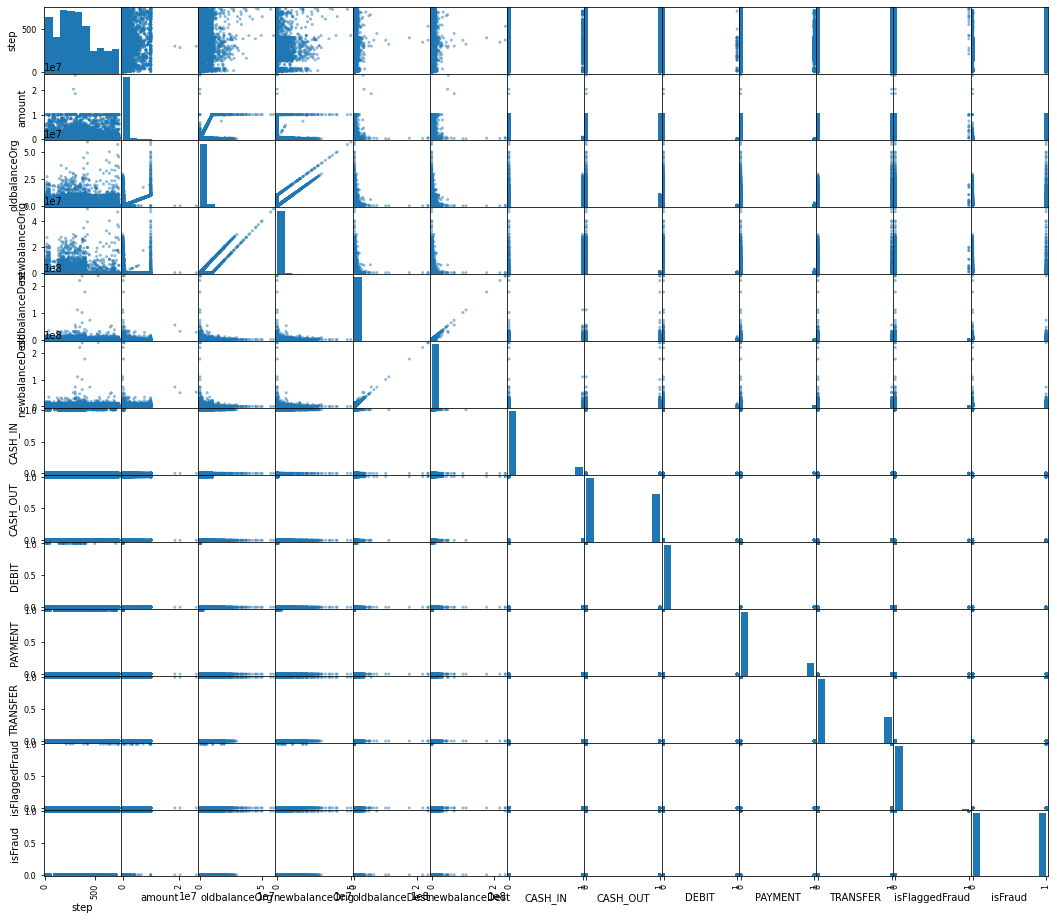

In [11]:
%%time

from pandas.plotting import scatter_matrix
atributos_mejor_correlacionados = ['TRANSFER', 'amount', 'step', \
                                   'oldbalanceOrg', \
                                   'CASH_OUT', \
                                   'newbalanceOrig', 'CASH_IN', 'PAYMENT', \
                                   'isFraud']

scatter_matrix (d, figsize=(18,16)) # Gráfico conjunto de correlaciones

plt.savefig('scatter_isFraud.jpg')
plt.show()

*¿Qué inferencias saca de la observación de los diagramas de dispersión de los atributos más correlacionados con la variable objetivo?*

* De la utilización de la función `scatter_matriz` pudimos verificar las correlaciones entre los atributos predictores y las correlaciones lineales de los predictores con la variable objetivo `isFraud`.

* Y también pudimos ver la independencia lineal entre algunos atributos predictores. 

In [3]:
import numpy as np 
import pandas as pd 

# para separar entrenamiento y testeo:
from sklearn.model_selection import train_test_split 

# para llenar datos faltantes (mediana)
from sklearn.impute import SimpleImputer

# para constituir la clase personalizada de selección de atributos predictores
from sklearn.base import BaseEstimator, TransformerMixin 

# Para estandarizar los datos (media 0 y varianza 1):
from sklearn.preprocessing import StandardScaler 


# Secuencia de imputació n, automatización del proceso:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

In [4]:
d=pd.read_csv("data_balanceada.csv")
d.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.0,0.0,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.0,0.0,220970.84,232249.12,0,1,0,0,0,0,0


In [17]:
#Separamos los datos de entrenamiento y testeo (20% testeo y 80% entrenamiento)
d_train, d_test = train_test_split(d, test_size = 0.2, random_state = 42)

### Dividimos las variables predictoras de la variable objetivo

In [44]:
d_train_pred = d_train.drop('isFraud', axis=1)
y_train = d_train.isFraud
d_test_pred = d_test.drop('isFraud', axis=1)
y_test = d_test.isFraud



# Automatización del escalamiento de datos

# *Estandarización*

In [20]:
# No se escalan los datos de tipo variable dicotomica, por lo tanto solo 
# se estandarizan 
# estas 6 variables: 'step', 'amount',"oldbalanceOrg","newbalanceOrig",
# "oldbalanceDest","newbalanceDest"

d_train_escalado = StandardScaler().fit_transform(d_train)
                                         
d_test_escalado=StandardScaler().fit_transform(d_test)



C:\Users\Marco\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Marco\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
count,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,-4.067438e-17,2.554189e-17,4.525764e-16,7.751537e-16,-2.938479e-16,3.403290e-16,0.111644,0.427169,0.003349,0.163775,0.294064,0.000913,0.500457
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,0.314940,0.494686,0.057772,0.370085,0.455638,0.030207,0.500019
min,-1.581166e+00,-4.425126e-01,-3.882566e-01,-2.120334e-01,-1.997710e-01,-2.803157e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.510757e-01,-4.219451e-01,-3.850202e-01,-2.120334e-01,-1.997710e-01,-2.803157e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.272193e-01,-3.481199e-01,-3.503341e-01,-2.120334e-01,-1.997710e-01,-2.520360e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.430396e-01,-1.503029e-01,-1.397418e-01,-2.120334e-01,-7.660898e-02,-3.938523e-02,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.244466e+00,1.067482e+01,1.844446e+01,2.010621e+01,5.602130e+01,5.241777e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Entrenamiento y selección de modelo.

* Instanciar varios modelos y entrenarlos sobre datos de entrenamiento
preparados.

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

sgdclass=SGDClassifier(random_state = 0)
forest=RandomForestClassifier(random_state = 0)

#Simplemente se usa fit y se entran tanto datos de entrenamiento como los y
sgdclass.fit(d_train_pred, y_train)
forest.fit(d_train_pred, y_train)

RandomForestClassifier(random_state=0)

Matriz de confusión para escoger modelo 

In [46]:
# Simplemente se presentan los mismos modelos pero con el comando nuevo
# de cross_val_predict y la cantidad de cv
%%time 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 


Pred_sgd = cross_val_predict(sgdclass, d_train, y, cv = 10 )
Pred_forest = cross_val_predict(forest, d_train, y, cv = 10 )

mc_sgd = confusion_matrix(y, Pred_sgd)
mc_forest = confusion_matrix(y, Pred_forest)

In [47]:
print('Matriz de confusión Forest\n\n', mc_forest)

# La matriz de confusión del modelo forest nos dice que hubo una clasificación
# 100% pefecta, donde ninguno de los datos fueron mal clasificados

Matriz de confusión Forest

 [[6564    0]
 [   0 6576]]


In [48]:
print('Matriz de confusión SGD\n\n', mc_sgd)

# La matriz de confusión del modelo SGD nos dice que hubo una clasificacion un poco
# más baja para el conjunto de datos donde 18 personas fueron clasificadas como
# fraude, y 9 personas que cometieron fraude fueron clasificados como aquellos que no
# lo cometieron, aún así debe tener en cuenta que son muy pocos dato aquellos mal 
# clasificados pero en comparación con el modelo Forest es un modelo que sí comete 
# errores.

Matriz de confusión SGD

 [[6559    5]
 [  11 6565]]


**Validación Cruzada**

Puntajes de los modelos mediante accuracy.

In [31]:
from sklearn.model_selection import cross_val_score

In [49]:
Pt_sgd = cross_val_score(sgdclass, d_train_pred, y_train, cv = 10, \
                         scoring="accuracy" )
Pt_forest = cross_val_score(forest, d_train_pred, y_train, cv = 10 ,\
                            scoring="accuracy")

print('Exactitud del modelo Forest: ', Pt_forest)
print('Exactitud del modelo SGD: ', Pt_sgd)


Precisión del modelo Forest:  [0.9870624  0.99162861 0.98858447 0.99086758 0.9870624  0.99010654
 0.99086758 0.98858447 0.98934551 0.99315068]
Precisión del modelo SGD:  [0.92922374 0.90639269 0.93987823 0.91248097 0.92237443 0.92541857
 0.94444444 0.93987823 0.92009132 0.92770167]


**Afinamiento del modelo**

Grilla de hiperparámetros 

In [50]:
#Parametros para testeo de los modelos

Param_sgd={
    "alpha":[1,0.1],
    "penalty":['l1', 'l2']
}

Param_forest={
    "max_depth":[10,15,20],
    "max_features":[3,5,7],
    "n_estimators":[100,150,200]
}

In [35]:
from sklearn.model_selection import GridSearchCV 

In [51]:
%%time
Grilla_forest= GridSearchCV(forest,Param_forest,cv=10,scoring = 'accuracy')

In [52]:
%%time


Grilla_forest.fit(d_train_pred,y_train)

Wall time: 9min 36s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 5, 7],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [53]:

Grilla_forest.best_params_ 

{'max_depth': 15, 'max_features': 7, 'n_estimators': 100}

Combinación de hiperparametros que devuelven el mejor modelo

In [41]:
# Modelos Forest y SGD con mejor combinación de hiperparámetros.

Mejor_forest=Grilla_forest.best_estimator_


In [54]:
y_test=d_test.isFraud

# Precisión con datos e testeo

print("Precisión datos de testeo para Forest:",\
      Mejor_forest.score(d_test_pred, y_test))


Precisión datos de testeo para Forest: 0.6707242848447961
Precisión datos de testeo para Forest: 0.8341448569689592


Note que para los datos de testeo y entrenamiento tenemos una precisión supremamente grande, esto se puede deber a que los datos están organizados para ser clasificados, este trabajo pretende mostrar el funcionamiento de los modelos SGD y random Forest para clasificación binaria pero hay que tener cuidado con futuros proyectos y nuevas entradas en la base de datos ya que los modelos funcionan a la perfección con este dataset, pero para clsificar nuevas entradas podríamos estar cometiendo errores ya que los modelos usados estarían ya acostumbrados a este dataset.
